# Decision Trees and Random Forests

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Creating a decision tree

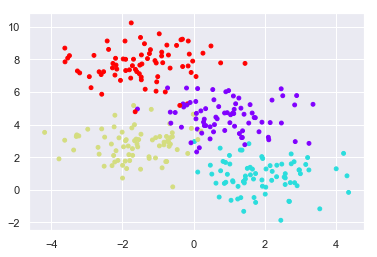

In [2]:
# Create data for decision tree
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=4, random_state = 0, cluster_std=1.0)
#fig = plt.figure(figsize=(10,6), dpi = 200)
plt.scatter(X[:,0], X[:,1], c=y, s=15, cmap='rainbow')

In [3]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X,y)

In [4]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
   
    ax = ax or plt.gca()
    
    # Ausgabe der Trainingspunkte
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap, clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Fitting the model
    model.fit(X,y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # Colored diagram of the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1)-0.5, cmap=cmap, zorder=1)
    ax.set(xlim=xlim, ylim=ylim)

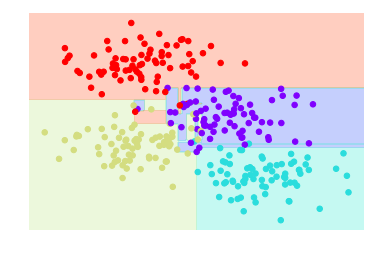

In [5]:
visualize_classifier(DecisionTreeClassifier(), X, y)

From the fifth step on, some strange classification regions appear. The more detailed classification regions are certainly not an intrinsic property of the data distribution but more of this particular sample. This means that the we tend to overfit the data already after five steps.<br>
If one trains the model with different training sets, the result in the detailed regions differ. Therefore one should use the results of different decision trees.

## Random Forests
### Bagging Classifier
The bagging classifier uses an ensemble of overfitting estimators and averages the results. Here we randomized the samples and used 80% of the data for the training each time.

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


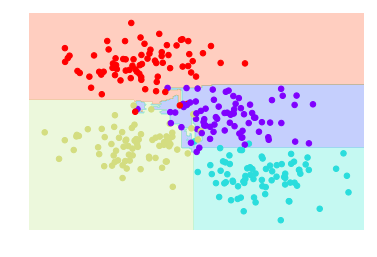

In [6]:
from sklearn.ensemble import BaggingClassifier
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)

bag.fit(X,y)
visualize_classifier(bag, X, y)

The combination of a decision tree classifier and a bagging classifier is implemented in the random forest classifier:

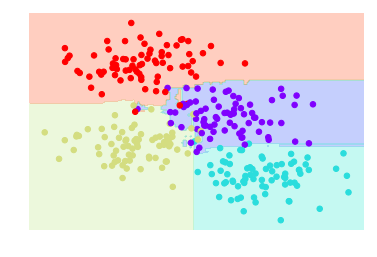

In [7]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)

visualize_classifier(model, X, y)

## Random Forest Regression

<ErrorbarContainer object of 3 artists>

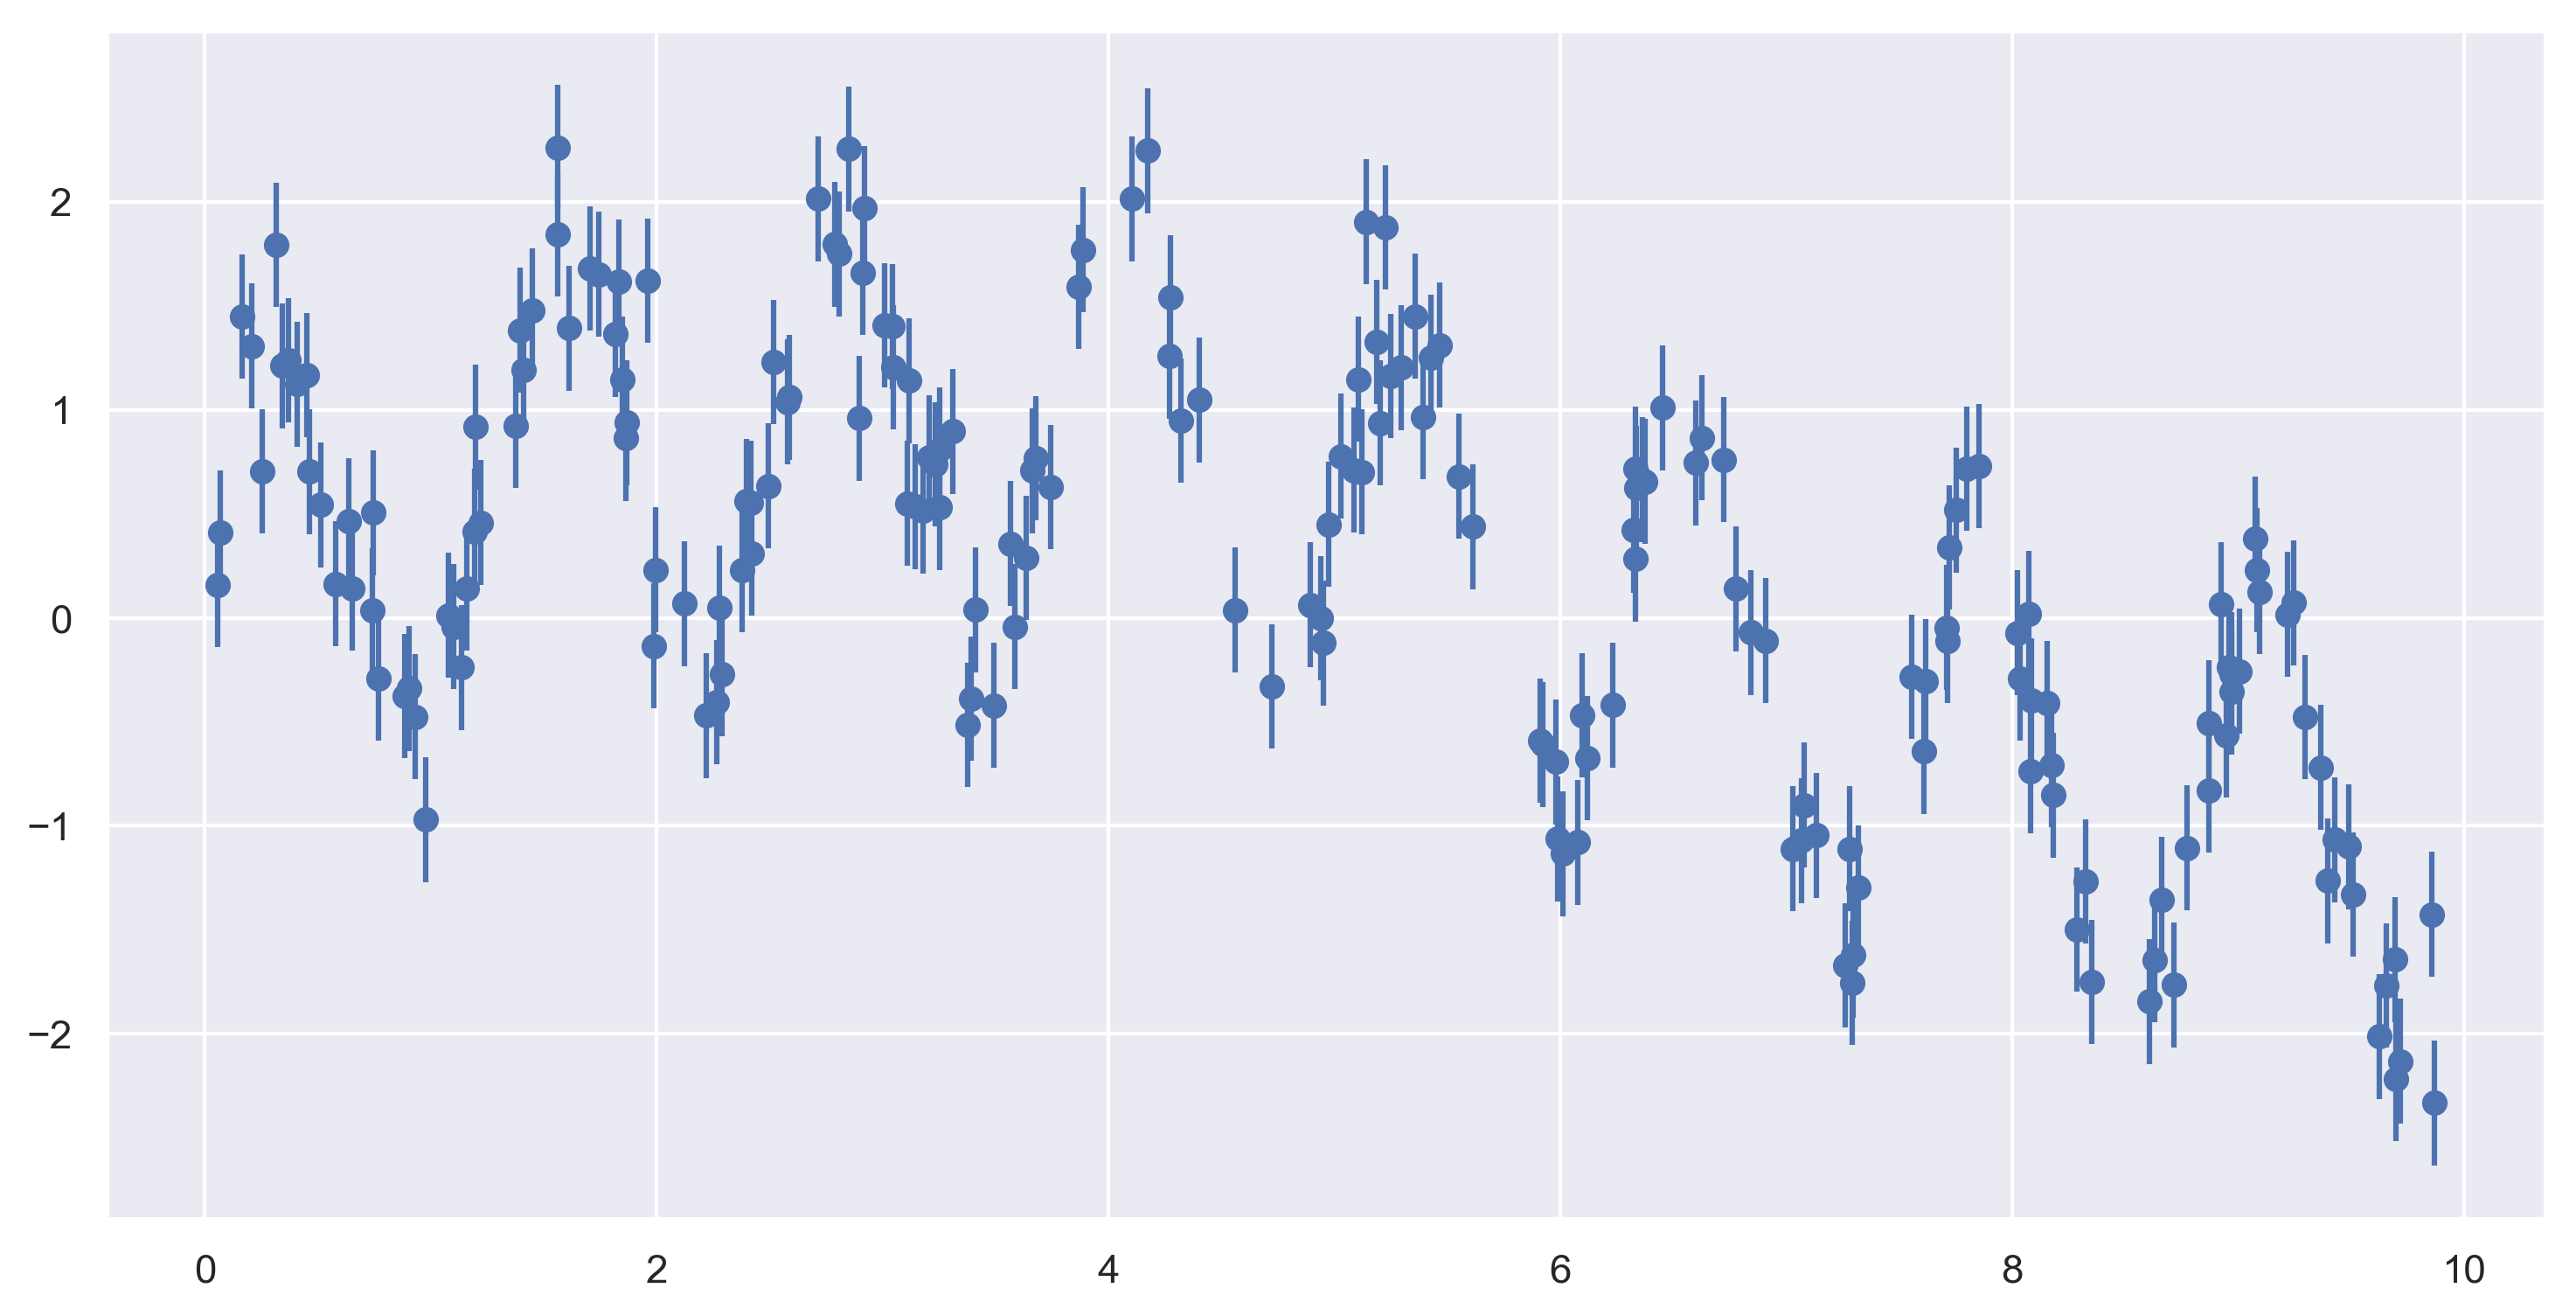

In [8]:
# generating data
rng = np.random.RandomState(42)
x = 10*rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5*x)
    slow_oscillation = np.sin(0.5*x)
    noise = sigma * rng.randn(len(x))
    return slow_oscillation + fast_oscillation + noise

y = model(x)
fig = plt.figure(figsize=(12,6), dpi=300)
plt.errorbar(x,y,0.3, fmt='o')

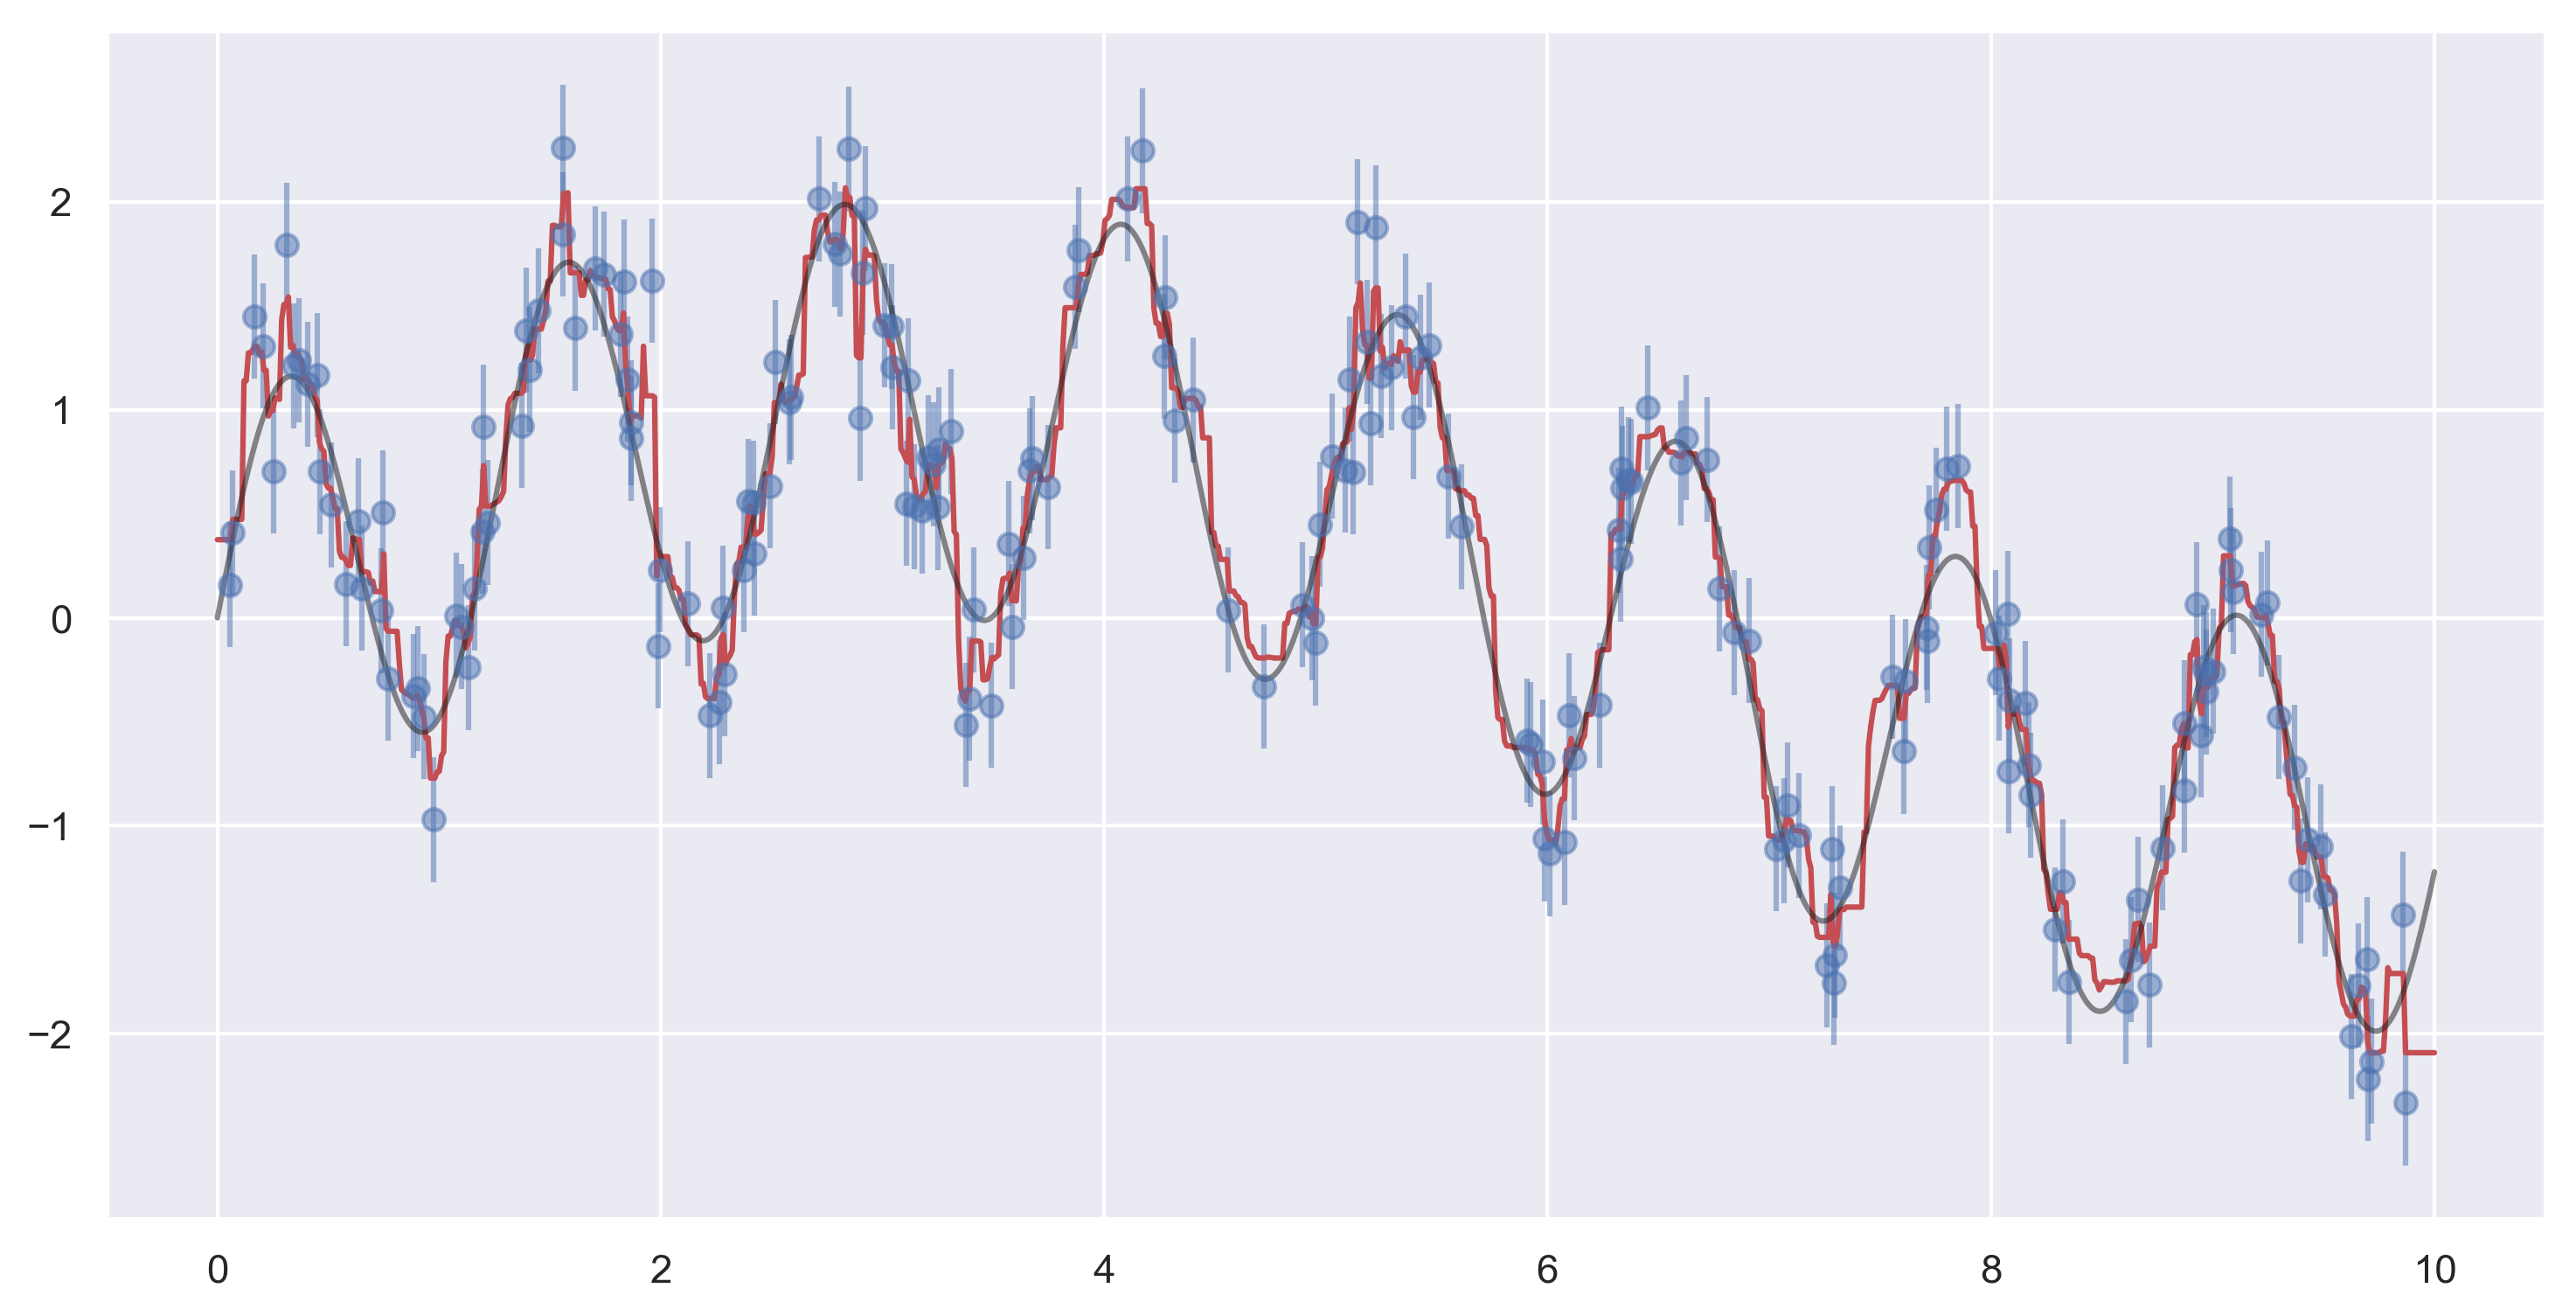

In [9]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:,None], y)

xfit = np.linspace(0,10,1000)
yfit = forest.predict(xfit[:,None])
ytrue = model(xfit, sigma=0)

fig = plt.figure(figsize=(12,6), dpi=300)
plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r')
plt.plot(xfit, ytrue, '-k', alpha=0.5)